In [1]:
import pandas as pd
import pickle
import missingno as msno
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [2]:

df = pd.read_csv('data/df_out.csv')
df.head()


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [3]:
df.shape

(10000, 20)

# Data Preparation


### Обработка  дубликатов

In [4]:
len(df[df.duplicated()])

#  Дубликатов нету

0

In [5]:
df.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
count,1.000000e+04,10000,10000,10000,1.000000e+04,9964.000000,10000,9872,9937,10000.00000,9834,9955,9998,9998,10000,9902.000000,9902.000000,9998,10000,9998
unique,NaN,10000,393,405,NaN,NaN,40,3466,5,NaN,6,3,9081,9845,51,NaN,NaN,9957,3,9911
top,NaN,https://chattanooga.craigslist.org/ctd/d/chatt...,"kansas city, MO",https://kansascity.craigslist.org,NaN,NaN,ford,f-150,gas,NaN,clean,automatic,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,ca,NaN,NaN,2021-04-19T10:00:54-0400,high,2021-04-22 15:01:24+00:00
freq,NaN,1,86,86,NaN,NaN,1638,151,8402,NaN,9518,7700,188,7,1108,NaN,NaN,2,3495,3
mean,7.311541e+09,NaN,NaN,NaN,2.067842e+04,2010.927941,NaN,NaN,NaN,93324.13400,NaN,NaN,NaN,NaN,NaN,38.594142,-94.165877,NaN,NaN,NaN
std,4.477653e+06,NaN,NaN,NaN,1.246230e+05,9.672040,NaN,NaN,NaN,63181.17499,NaN,NaN,NaN,NaN,NaN,5.844895,18.128504,NaN,NaN,NaN
min,7.208550e+09,NaN,NaN,NaN,5.000000e+02,1915.000000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,-67.144243,-158.069300,NaN,NaN,NaN
25%,7.308189e+09,NaN,NaN,NaN,7.900000e+03,2008.000000,NaN,NaN,NaN,39147.25000,NaN,NaN,NaN,NaN,NaN,34.830368,-110.322086,NaN,NaN,NaN
50%,7.312757e+09,NaN,NaN,NaN,1.574950e+04,2013.000000,NaN,NaN,NaN,89000.00000,NaN,NaN,NaN,NaN,NaN,39.298522,-88.000050,NaN,NaN,NaN
75%,7.315274e+09,NaN,NaN,NaN,2.799000e+04,2017.000000,NaN,NaN,NaN,136875.00000,NaN,NaN,NaN,NaN,NaN,42.428070,-80.830000,NaN,NaN,NaN


### Обработка пропусков

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [7]:
amount = len(df.dropna())
quote = (amount / len(df)) * 100
print(f'''
количество полностью заполненных объектов: {amount} 
их процент из всей выборки: {round(quote, 2)}''')


количество полностью заполненных объектов: 9507 
их процент из всей выборки: 95.07


<Axes: >

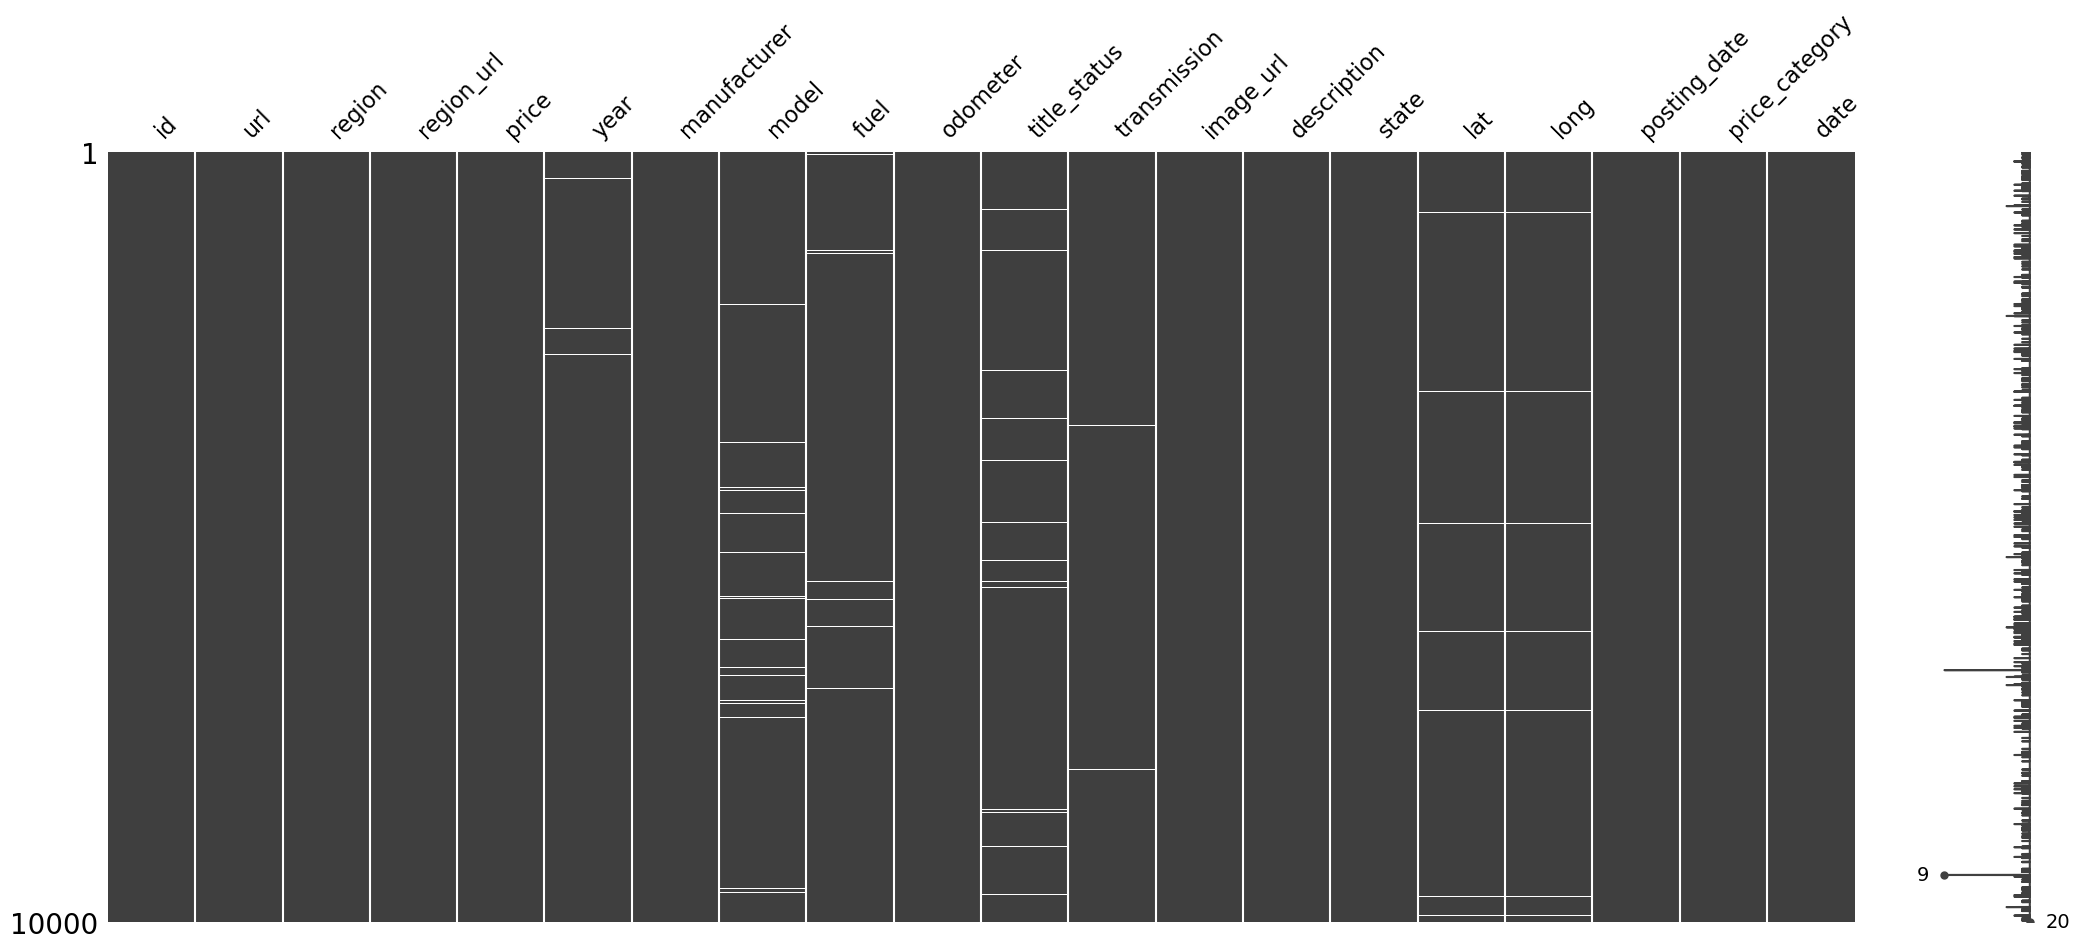

In [8]:
msno.matrix(df)

In [9]:
# процент пропущенных значений для каждого признака

missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print(missing_values)

title_status      1.66
model             1.28
long              0.98
lat               0.98
fuel              0.63
transmission      0.45
year              0.36
posting_date      0.02
description       0.02
image_url         0.02
date              0.02
url               0.00
odometer          0.00
manufacturer      0.00
state             0.00
price             0.00
region_url        0.00
region            0.00
price_category    0.00
id                0.00
dtype: float64


In [10]:
# Обработка пропусков в годе выпуска автомобиля

print(f'количество пропущенных значений в годе выпуска автомобиля: {df.year.isna().sum()}')

количество пропущенных значений в годе выпуска автомобиля: 36


In [11]:
df_clean = df.copy()

df_clean = df_clean[df_clean.year.notna()]
df_clean.shape

(9964, 20)

In [12]:
#Обработка пропусков в типе топлива


In [13]:
df_clean.fuel.value_counts(dropna=False)

gas         8379
other        729
diesel       650
hybrid       108
NaN           54
electric      44
Name: fuel, dtype: int64

In [14]:
# заполняем незаполненные значения типа топлива значением other
df_clean.fuel = df_clean.fuel.fillna('other')

In [15]:
#Обработка пропусков в модели автомобиля

df_clean.model.value_counts(dropna=False)

f-150                        151
NaN                          126
silverado 1500               110
1500                         100
camry                         77
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: model, Length: 3447, dtype: int64

In [16]:
df_clean.model.describe()

count      9838
unique     3446
top       f-150
freq        151
Name: model, dtype: object

In [17]:
df_clean.model = df_clean.model.fillna('other')

In [18]:
# Обработка пропусков в статусе автомобиля

df_clean.title_status.value_counts(dropna=False)

clean         9492
rebuilt        168
NaN            159
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [19]:
# заполнияем незаполненные значения статуса автомобиля модой

df_clean.title_status = df_clean.title_status.fillna(df_clean.title_status.describe().top)

<Axes: >

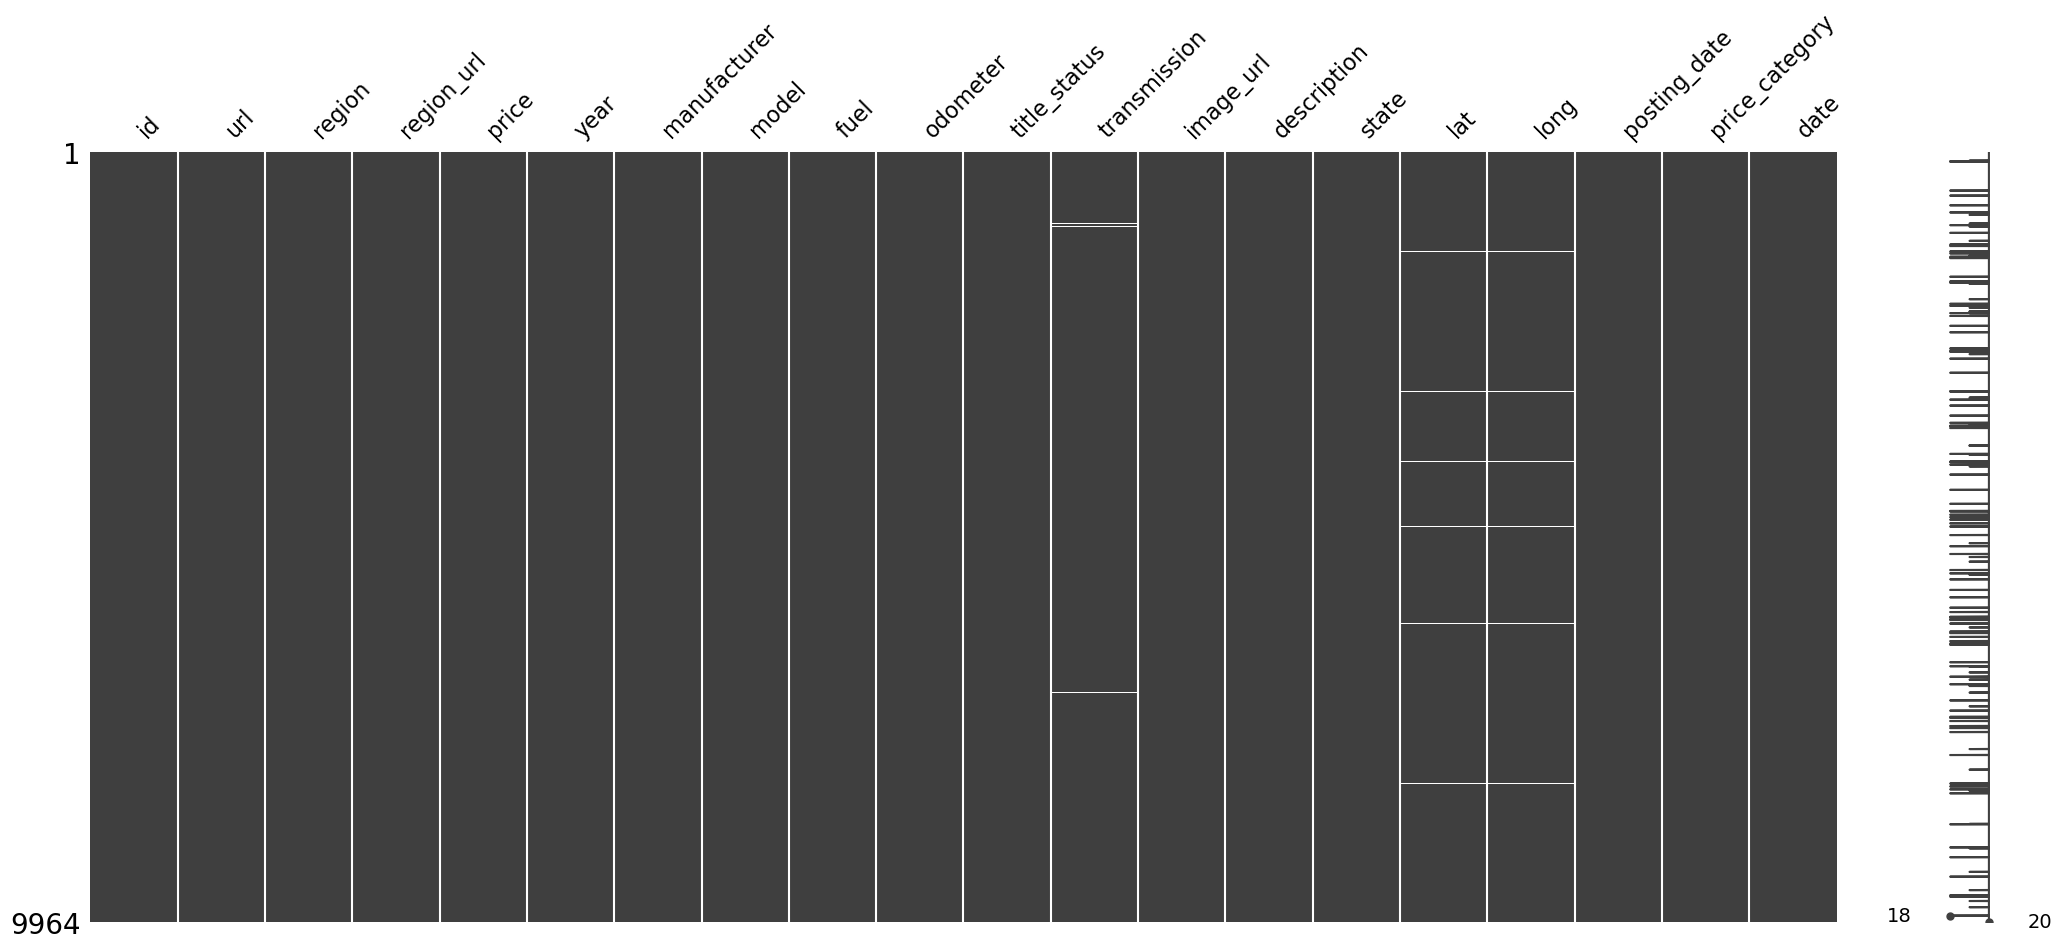

In [20]:
msno.matrix(df_clean)

In [21]:
# Обработка пропусков в широте , долготе

df_clean.lat.value_counts(dropna=False)

NaN          96
43.182400    88
33.779214    79
40.468785    73
33.786500    54
             ..
32.764500     1
33.394300     1
41.315400     1
40.698200     1
42.123900     1
Name: lat, Length: 5042, dtype: int64

In [22]:
df_clean.long.value_counts(dropna=False)

 NaN           96
-84.112200     88
-84.411811     79
-74.281707     73
-84.445400     54
               ..
-118.194959     1
-93.286303      1
-73.098000      1
-73.732600      1
-79.189500      1
Name: long, Length: 5075, dtype: int64

In [23]:
df_clean[df_clean.lat.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016.0,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014.0,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008.0,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium,2021-04-30 16:09:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013.0,bmw,x5,gas,97195,clean,automatic,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,NaN,NaN,2021-04-26T07:31:40-0400,medium,2021-04-26 11:31:40+00:00
9408,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018.0,lexus,nx 300,gas,19863,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24T00:54:33-0400,high,2021-04-24 04:54:33+00:00
9650,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013.0,jeep,grand cherokee,other,90878,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01T20:53:57-0400,medium,2021-05-02 00:53:57+00:00
9668,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015.0,ford,f-250 super duty,diesel,153524,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18T08:43:25-0400,high,2021-04-18 12:43:25+00:00


In [24]:
(df_clean.long.isna() | df_clean.lat.isna()).sum()

96

In [25]:
df_clean = df_clean[~(df_clean.long.isna() | df_clean.lat.isna())]
df_clean.shape

(9868, 20)

In [26]:
# Обработка пропусков в столбце: коробка передач

df_clean.transmission.value_counts(dropna=False)

automatic    7577
other        1622
manual        626
NaN            43
Name: transmission, dtype: int64

In [27]:
df_clean.transmission.describe()

count          9825
unique            3
top       automatic
freq           7577
Name: transmission, dtype: object

In [28]:
# заполнияем незаполненные значения в коробке передач самым часто встречающимся

df_clean.transmission = df_clean.transmission.fillna(df_clean.transmission.describe().top)

<Axes: >

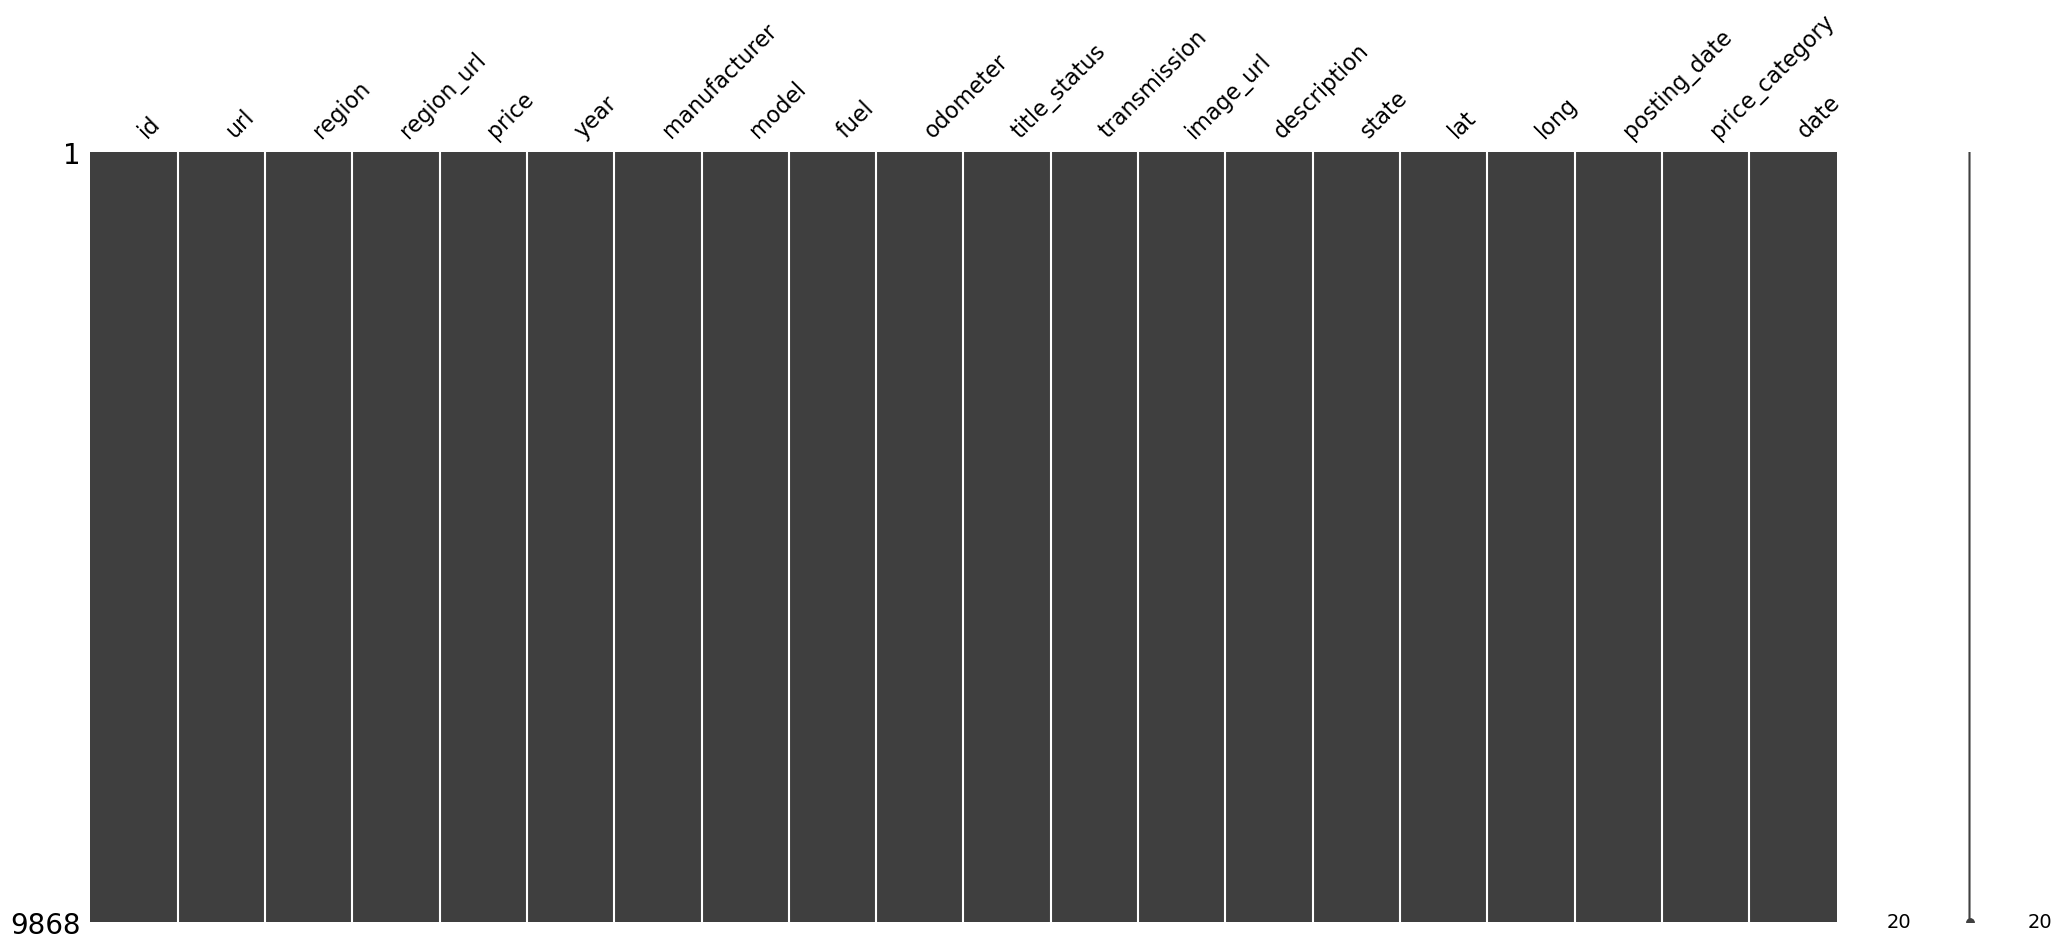

In [29]:
msno.matrix(df_clean)

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9868 non-null   object 
 7   model           9868 non-null   object 
 8   fuel            9868 non-null   object 
 9   odometer        9868 non-null   int64  
 10  title_status    9868 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   o

### Преобразование типов данных

In [31]:
df_clean.dtypes

id                  int64
url                object
region             object
region_url         object
price               int64
year              float64
manufacturer       object
model              object
fuel               object
odometer            int64
title_status       object
transmission       object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
date               object
dtype: object

In [32]:
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [33]:
# Преобразование года и даты

df_clean.year.describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [34]:
df_clean.year = df_clean.year.astype(int)

In [35]:
df_clean.year.dtype

dtype('int64')

In [36]:
df_clean.posting_date = pd.to_datetime(df_clean.posting_date, utc=True)

In [37]:
df_clean.date = pd.to_datetime(df_clean.date, utc=True)

In [38]:
# Преобразование fuel в тип данных category

df_clean.fuel.dtype

dtype('O')

In [39]:
df_clean.fuel = df_clean.fuel.astype('category')


In [40]:
# Преобразование transmission в тип данных category

df_clean.transmission = df_clean.transmission.astype('category')

In [41]:
df_clean.title_status.nunique()

6

In [42]:
# Преобразование title_status в тип данных category

df_clean.title_status = df_clean.title_status.astype('category')

In [43]:
# Преобразование price_category в тип данных category

df_clean.price_category.nunique()

3

In [44]:
df_clean.price_category = df_clean.price_category.astype('category')

In [45]:
# Преобразование lat, long

df_clean.lat = pd.to_numeric(df_clean['lat'], errors='coerce')
df_clean.long = pd.to_numeric(df_clean['long'], errors='coerce')

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9868 non-null   int64              
 1   url             9868 non-null   object             
 2   region          9868 non-null   object             
 3   region_url      9868 non-null   object             
 4   price           9868 non-null   int64              
 5   year            9868 non-null   int64              
 6   manufacturer    9868 non-null   object             
 7   model           9868 non-null   object             
 8   fuel            9868 non-null   category           
 9   odometer        9868 non-null   int64              
 10  title_status    9868 non-null   category           
 11  transmission    9868 non-null   category           
 12  image_url       9868 non-null   object             
 13  description     9868 non-null   o

###  Поиск аномалий и выбросов

In [47]:
# Выбросы в годе выпуска

df_clean.year.describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [48]:
def boundary(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    bound = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return bound


boundaries = boundary(df_clean.year)

print(f'''
Минимальное значение: {df_clean.year.min()}. Нижняя граница в интерквартильном размахе: {boundaries[0]}.
Максимальное значение: {df_clean.year.max()}. Верхняя граница в интерквартильном размахе: {boundaries[1]}.
Значит среди максимальных значений выбросов нету. Но есть выбросы среди минимальных значений.
''')




Минимальное значение: 1915. Нижняя граница в интерквартильном размахе: 1994.5.
Максимальное значение: 2022. Верхняя граница в интерквартильном размахе: 2030.5.
Значит среди максимальных значений выбросов нету. Но есть выбросы среди минимальных значений.



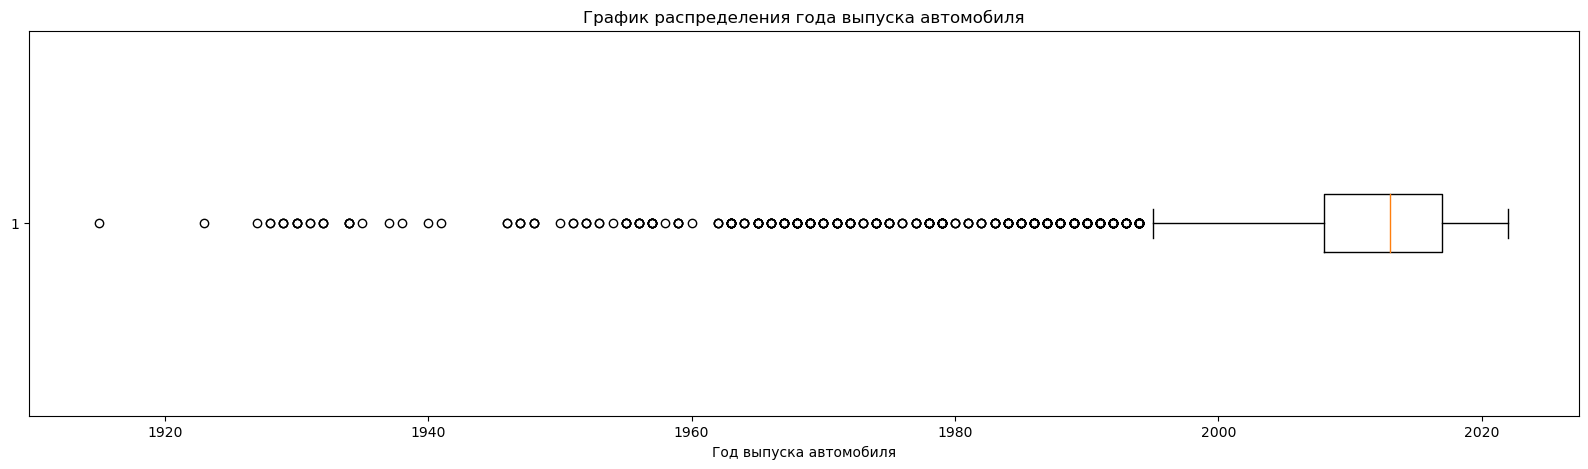

In [49]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.boxplot(df_clean.year, vert=False)
ax.set_xlabel('Год выпуска автомобиля')
ax.set_title('График распределения года выпуска автомобиля')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [50]:
throws = df_clean.year < boundaries[0]
total = throws.sum()

part = round((total / df_clean.year.count()) * 100, 2)

print(f'Количество выбросов {total} и их доля {part}')

Количество выбросов 394 и их доля 3.99


In [51]:
df_clean.loc[throws, 'year'] = int(round(boundaries[0]))

In [52]:
df_clean.year.describe()

count    9868.000000
mean     2011.658391
std         6.530991
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [53]:
# Выбросы в odometer

df_clean.odometer.describe()

count      9868.000000
mean      93647.193048
std       63260.139717
min           0.000000
25%       39252.500000
50%       89116.000000
75%      137198.250000
max      283466.000000
Name: odometer, dtype: float64

In [54]:
boundaries_2 = boundary(df_clean.odometer)

print(f'''
Минимальное значение: {df_clean.odometer.min()}. Нижняя граница в интерквартильном размахе: {boundaries_2[0]}.
Максимальное значение: {df_clean.odometer.max()}. Верхняя граница в интерквартильном размахе: {boundaries_2[1]}.
Значит среди минимальных и максимальных значений выбросов нету. 
''')


Минимальное значение: 0. Нижняя граница в интерквартильном размахе: -107666.125.
Максимальное значение: 283466. Верхняя граница в интерквартильном размахе: 284116.875.
Значит среди минимальных и максимальных значений выбросов нету. 



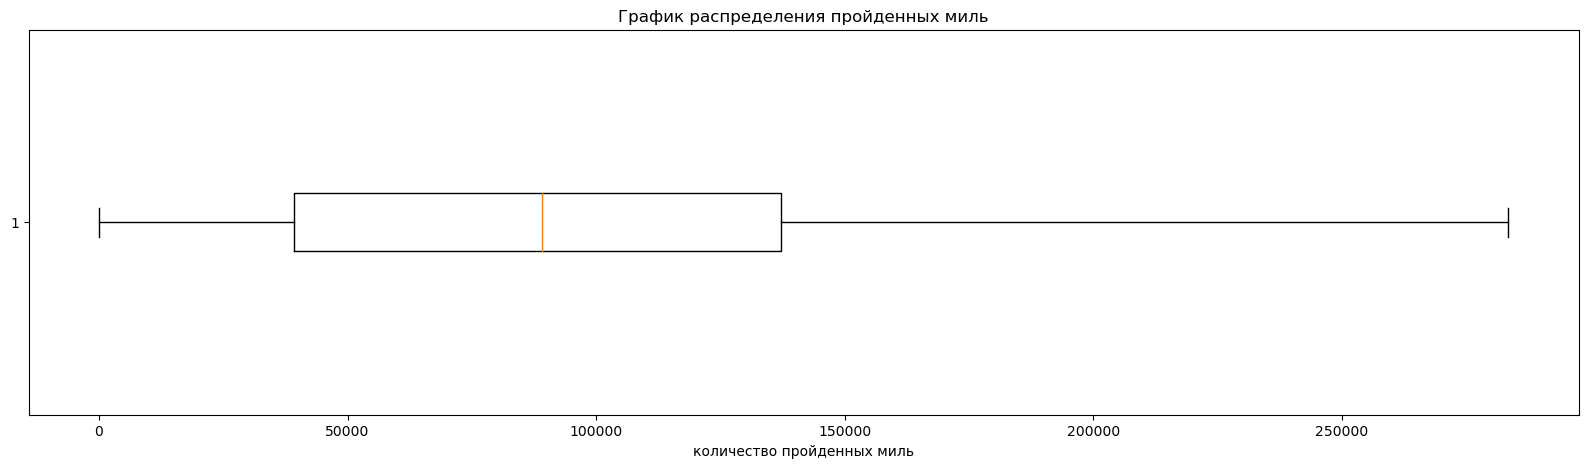

In [55]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.boxplot(df_clean.odometer, vert=False)
ax.set_xlabel('количество пройденных миль')
ax.set_title('График распределения пройденных миль')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [56]:
# Выбросы в price

boundaries_3 = boundary(df_clean.price)

print(f'''
Минимальное значение: {df_clean.price.min()}. Нижняя граница в интерквартильном размахе: {boundaries_3[0]}.
Максимальное значение: {df_clean.price.max()}. Верхняя граница в интерквартильном размахе: {boundaries_3[1]}.
Значит среди минимальных значений выбросов нету. Но есть выбросы среди максимальных значений.
''')


Минимальное значение: 500. Нижняя граница в интерквартильном размахе: -22485.0.
Максимальное значение: 12345678. Верхняя граница в интерквартильном размахе: 58275.0.
Значит среди минимальных значений выбросов нету. Но есть выбросы среди максимальных значений.



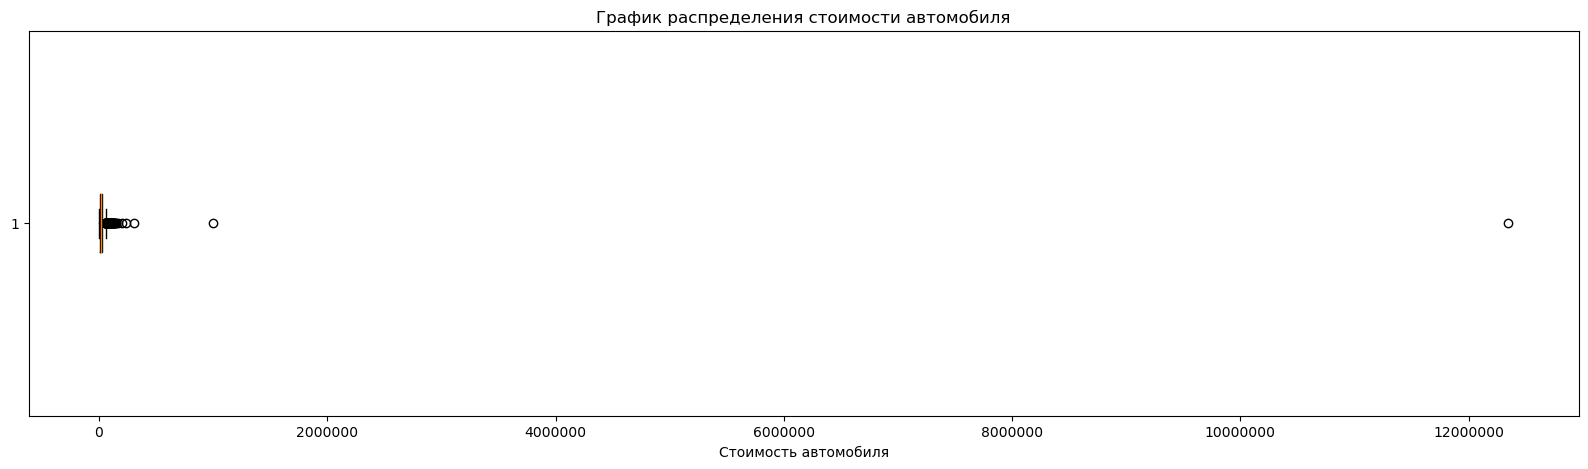

In [57]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.boxplot(df_clean.price, vert=False)
ax.set_xlabel('Стоимость автомобиля')
ax.set_title('График распределения стоимости автомобиля')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [58]:
throws = df_clean.price > boundaries_3[1]
total = throws.sum()

part = round((total / df_clean.price.count()) * 100, 2)

print(f'Количество выбросов {total} и их доля {part}')

Количество выбросов 207 и их доля 2.1


In [59]:
df_clean = df_clean[~(df_clean.price > boundaries_3[1])]
df_clean.shape

(9661, 20)

In [60]:
# Выбросы в lat

df_clean.lat.describe()

count    9661.000000
mean       38.600109
std         5.724183
min        19.541726
25%        34.920000
50%        39.297045
75%        42.381300
max        64.947500
Name: lat, dtype: float64

In [61]:
boundaries_4 = boundary(df_clean.lat)

print(f'''
Минимальное значение: {df_clean.lat.min()}. Нижняя граница в интерквартильном размахе: {boundaries_4[0]}.
Максимальное значение: {df_clean.lat.max()}. Верхняя граница в интерквартильном размахе: {boundaries_4[1]}.
Значит есть выбросы среди максимальных и минимальных значений.
''')


Минимальное значение: 19.541726. Нижняя граница в интерквартильном размахе: 23.72805.
Максимальное значение: 64.9475. Верхняя граница в интерквартильном размахе: 53.57325.
Значит есть выбросы среди максимальных и минимальных значений.



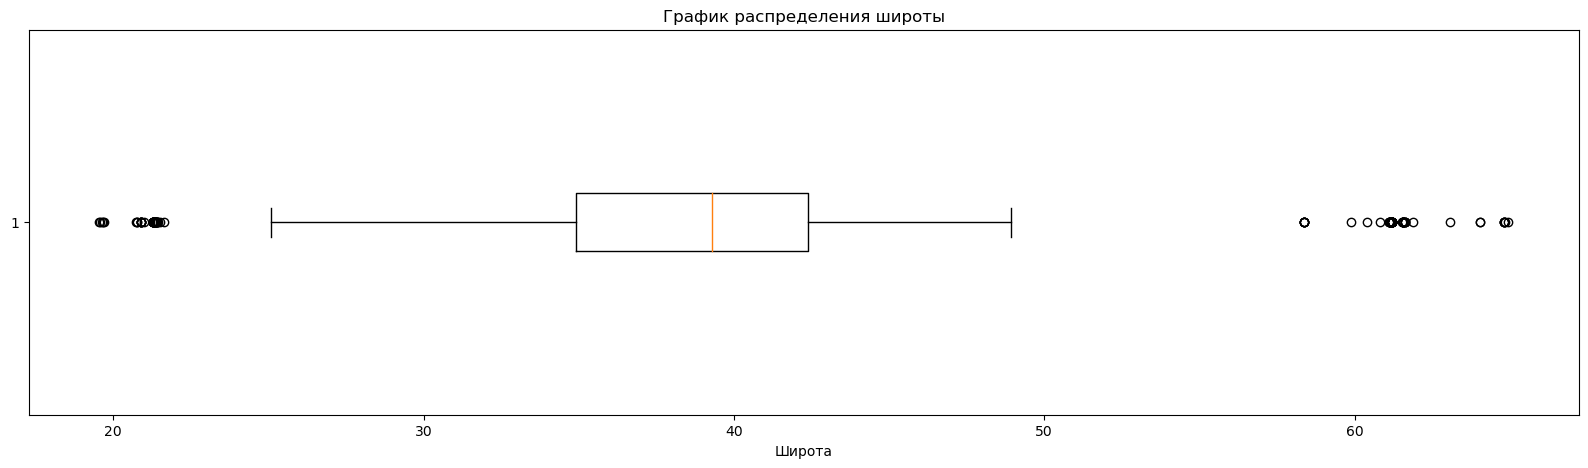

In [62]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.boxplot(df_clean.lat, vert=False)
ax.set_xlabel('Широта')
ax.set_title('График распределения широты')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [63]:
throws = df_clean.lat > boundaries_4[1]
total = throws.sum()

part = round((total / df_clean.lat.count()) * 100, 2)

print(f'Количество выбросов больше верхней границы {total} и их доля {part}')

Количество выбросов больше верхней границы 85 и их доля 0.88


In [64]:
df_clean = df_clean[~(df_clean.lat > boundaries_4[1])]
df_clean.shape

(9576, 20)

In [65]:
throws = df_clean.lat < boundaries_4[0]
total = throws.sum()

part = round((total / df_clean.lat.count()) * 100, 2)

print(f'Количество выбросов меньше нижней границы {total} и их доля {part}')

Количество выбросов меньше нижней границы 53 и их доля 0.55


In [66]:
df_clean = df_clean[~(df_clean.lat < boundaries_4[0])]
df_clean.shape

(9523, 20)

In [67]:
# Выбросы в long

df_clean.long.describe()

count    9523.000000
mean      -93.089802
std        16.558879
min      -124.263982
25%      -106.078708
50%       -87.633814
75%       -80.600000
max        94.163200
Name: long, dtype: float64

In [68]:
boundaries_5 = boundary(df_clean.long)

print(f'''
Минимальное значение: {df_clean.long.min()}. Нижняя граница в интерквартильном размахе: {boundaries_5[0]}.
Максимальное значение: {df_clean.long.max()}. Верхняя граница в интерквартильном размахе: {boundaries_5[1]}.
Значит среди минимальных значений выбросов нету. Но есть выбросы среди максимальных значений.
''')


Минимальное значение: -124.263982. Нижняя граница в интерквартильном размахе: -144.29677000000004.
Максимальное значение: 94.1632. Верхняя граница в интерквартильном размахе: -42.38193799999998.
Значит среди минимальных значений выбросов нету. Но есть выбросы среди максимальных значений.



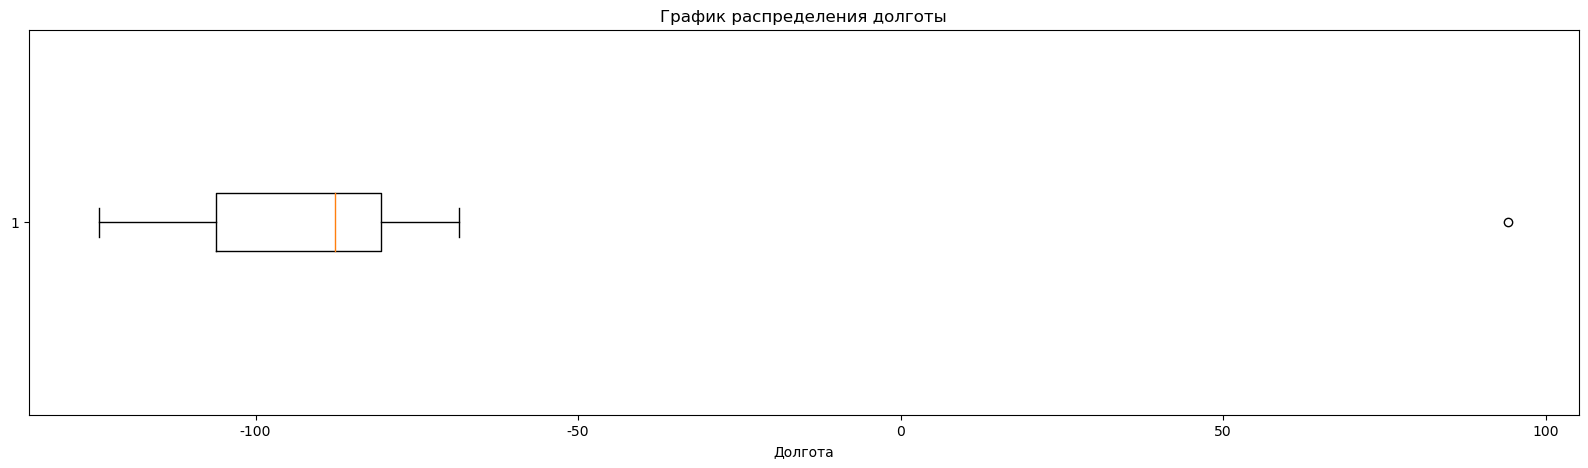

In [69]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.boxplot(df_clean.long, vert=False)
ax.set_xlabel('Долгота')
ax.set_title('График распределения долготы')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [70]:
throws = df_clean.long > boundaries_5[1]
total = throws.sum()

part = round((total / df_clean.long.count()) * 100, 2)

print(f'Количество выбросов {total} и их доля {part}')

Количество выбросов 1 и их доля 0.01


In [71]:
df_clean = df_clean[~(df_clean.long > boundaries_5[1])]
df_clean.shape

(9522, 20)

### Исследование зависимости стоимости автомобиля от года производства

In [72]:
new_df = df_clean.groupby(by=['year'], as_index=False).agg({'price': 'mean'})
new_df = new_df.rename(columns={'price': 'price_mean'})
new_df

,year,price_mean
0,1994,13627.775726
1,1995,9863.500000
2,1996,9362.960000
3,1997,6486.404762
4,1998,6528.672727
5,1999,7446.641975
6,2000,7614.410256
7,2001,7844.256198
8,2002,7141.189189
9,2003,7806.683060


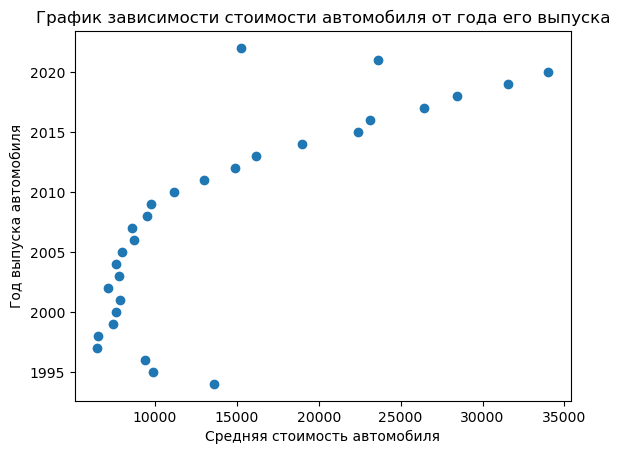

In [73]:
plt.figure()
plt.scatter(new_df.price_mean, new_df['year'])
plt.xlabel('Средняя стоимость автомобиля')
plt.ylabel('Год выпуска автомобиля')
plt.title('График зависимости стоимости автомобиля от года его выпуска')
plt.show();

In [74]:
new_df = df_clean.groupby('year', as_index=False)['id'].count()
new_df

,year,id
0,1994,379
1,1995,32
2,1996,25
3,1997,42
4,1998,55
5,1999,81
6,2000,78
7,2001,121
8,2002,148
9,2003,183


In [75]:
df_clean = df_clean[(df_clean['year'] < 2021)]
df_clean.shape


(9481, 20)

In [76]:
new_df = df_clean.groupby(by=['year'], as_index=False).agg({'price': 'mean'})
new_df = new_df.rename(columns={'price': 'price_mean'})
new_df

,year,price_mean
0,1994,13627.775726
1,1995,9863.500000
2,1996,9362.960000
3,1997,6486.404762
4,1998,6528.672727
5,1999,7446.641975
6,2000,7614.410256
7,2001,7844.256198
8,2002,7141.189189
9,2003,7806.683060


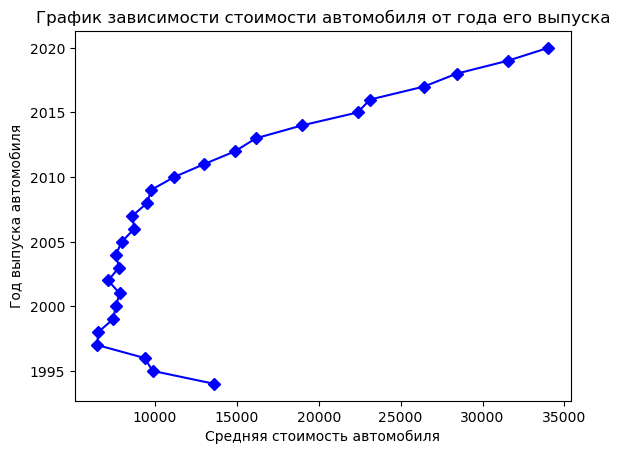

In [77]:
plt.figure()
plt.plot(new_df.price_mean, new_df['year'], color='blue', marker='D')
plt.xlabel('Средняя стоимость автомобиля')
plt.ylabel('Год выпуска автомобиля')
plt.title('График зависимости стоимости автомобиля от года его выпуска')
plt.show();

In [78]:
new_df['year'].corr(new_df['price_mean'])

# Коэффициент корреляции Пирсона больше 0.7, значит есть сильная зависимость стоимости автомобиля от года
# выпуска. Cвязь прямая, тк большему значению по оси ОХ соответствует большее значение по оси ОУ, 
# и коэффициент положительный.

0.8210600957869129

# Feature engineering

### Создание новых признаков

In [79]:
# Признаки на основе текстовых значений переменных

print(f'Список уникальных значений моделей автомобилей: \n{df_clean.model.unique().tolist()}')

Список уникальных значений моделей автомобилей: 
['2500 crew cab big horn', 'explorer 4wd 4dr xlt', 'golf r hatchback', 'rav4', '1 series 128i coupe 2d', 'fusion se', 'accord', 'charger', 'altima', 'galant', '500 pop', 'town car', 'e-series van universal by glaval designer luxury series conversion leather 16" dvd limo lighting bed', 'g. caravan se', 'mustang', 'maxima sv', 'civic', 'explorer', 'vue v6', 'tahoe', 'f-350', 'f150', 'clubman', 'xts sedan 4d', '3500', '2500 4x4', 'rogue', 'silverado 1500', 'compass 4x4', 'camry solara 2dr cpe se v6 auto (natl)', 'silverado', 'renegade', 'forte5', 'f-150', 'wrangler unlimited all new', 'mazda3 touring sedan 4d', '535i', 'park avenue', 'camry', 'gx', 'f150 lariat', 'titan', 'corolla', 'colorado extended cab', 'tiguan 2.0t s', 'impreza', 'jetta s', 'super duty f-250 srw', 'altima 2.5 s', 'q5', 'es 350 f sport sedan 4d', 'lx450', 'pilot', 'Diahatsu', 'other', 'sequoia', '1500 classic', 'tucson se awd', 'sierra 1500', 'mazda3', 'grand cherokee l

In [80]:
df_clean['short_model'] = df_clean.model.apply(lambda x: x.split()[0])
df_clean.short_model

0           2500
1       explorer
2           golf
3           rav4
5              1
          ...   
9995        rav4
9996    wrangler
9997          a3
9998     cayenne
9999        1500
Name: short_model, Length: 9481, dtype: object

In [81]:
print(f'количество получившихся уникальных значений: {df_clean.short_model.nunique()}')

количество получившихся уникальных значений: 937


In [82]:
df_clean['region_new'] = df_clean.region_url.apply(lambda x: x.lower().split('://')[1].split('.')[0])
df_clean['region_corrected'] = df_clean['region'].apply(lambda x: x.lower().split('/')[0].replace(' ', '').replace('-', ''))

In [83]:
df_clean['manufacturer_model'] = df_clean.manufacturer + ': ' + df_clean.model
df_clean['desc_len'] = df_clean.apply(lambda x: len(x.description) , axis=1)
df_clean['model_in_desc'] = df_clean.apply(lambda x: 1 if x.model in x.description else 0, axis=1)
df_clean['model_len'] = df_clean.apply(lambda x: len(x.model) , axis=1)
df_clean['model_word_count'] = df_clean['model'].apply(lambda x: len(x.split()))

In [84]:
manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
    col_name = 'is_' + manufacturer

    df_clean[col_name] = df_clean.apply(lambda x: 1 if x.manufacturer == manufacturer else 0, axis=1)

In [85]:
# Признаки на основе числовых переменных

# odometer_km - пройденное расстояние в км

df_clean['odometer_km'] = df_clean.apply(lambda x: x.odometer  * 1.609344, axis=1)

In [86]:
df_clean['odometer/price'] = df_clean.apply(lambda x: x.odometer / x.price, axis=1)
df_clean['odometer/price'].corr(df_clean['odometer'])

0.5211617197452749

In [87]:
df_clean['price_k$'] = df_clean.apply(lambda x: round(x.price / 1000) , axis=1)
df_clean['price'].corr(df_clean['price_k$'])

0.9997987238550974

In [88]:
df_clean.year.describe()

count    9481.000000
mean     2011.495623
std         6.484419
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [89]:
df_clean['age_category'] =  df_clean.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)


In [90]:
df_clean['age_category'].value_counts()

new        4402
average    3475
old        1604
Name: age_category, dtype: int64

In [91]:
# Признаки на основе дат

df_clean['month'] = df_clean.date.dt.month
df_clean['dayofweek'] = df_clean.date.dt.day_of_week
df_clean['diff_years'] = df_clean.year - df_clean.date.dt.year

In [92]:
df_clean.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'short_model', 'region_new',
       'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc',
       'model_len', 'model_word_count', 'is_audi', 'is_ford', 'is_chevrolet',
       'is_toyota', 'is_jeep', 'is_honda', 'is_nissan', 'odometer_km',
       'odometer/price', 'price_k$', 'age_category', 'month', 'dayofweek',
       'diff_years'],
      dtype='object')

### Преобразование категориальных данных 

In [93]:
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

In [94]:
df_clean.fuel.unique()

['diesel', 'other', 'gas', 'electric', 'hybrid']
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']

In [95]:
ohe.fit(df_clean[['fuel']])

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [96]:
ohe_fuel = ohe.transform(df_clean[['fuel']])
ohe_fuel

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [97]:
ohe.categories_

[array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)]

In [98]:
ohe.get_feature_names_out()

array(['fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'fuel_other'], dtype=object)

In [99]:
df_clean[ohe.get_feature_names_out()] = ohe_fuel
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,price_k$,age_category,month,dayofweek,diff_years,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,55,new,4,5,-1,1.0,0.0,0.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,17,new,5,0,-5,0.0,0.0,0.0,0.0,1.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,36,new,4,2,-4,0.0,0.0,1.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,14,average,4,5,-8,0.0,0.0,1.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,15,average,4,3,-9,0.0,0.0,0.0,0.0,1.0


In [100]:
data = df_clean[['transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category', 'short_model']]
data

,transmission,region,manufacturer,state,title_status,age_category,short_model
0,other,chattanooga,ram,tn,clean,new,2500
1,automatic,north jersey,ford,nj,clean,new,explorer
2,other,reno / tahoe,volkswagen,ca,clean,new,golf
3,automatic,fayetteville,toyota,nc,clean,average,rav4
5,other,knoxville,bmw,tn,clean,average,1
...,...,...,...,...,...,...,...
9995,automatic,chautauqua,toyota,ny,clean,old,rav4
9996,other,binghamton,jeep,ny,clean,average,wrangler
9997,automatic,salem,audi,or,clean,average,a3
9998,automatic,madison,porsche,wi,clean,new,cayenne


In [101]:
ohe_2 = OneHotEncoder(sparse=False)
ohe_2

OneHotEncoder(sparse=False)

In [102]:
category_list = ['short_model','transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']
ohe_2.fit(data[category_list])

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [103]:
ohe_transormed_2 = ohe_2.transform(data[category_list])
ohe_transormed_2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [104]:
ohe_transormed_2.shape

(9481, 1428)

In [106]:
df_clean[ohe_2.get_feature_names_out()] = ohe_transormed_2
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Нормализация 

In [107]:
# Нормализация 'odometer', 'price'

std_scaler_1 = StandardScaler()
std_scaler_1

StandardScaler()

In [108]:
std_scaler_1.fit(df_clean[['odometer', 'price']])

StandardScaler()

In [109]:
print('Среднее:', std_scaler_1.mean_)
print('Дисперсия', std_scaler_1.var_)

Среднее: [95536.94842316 17996.9551735 ]
Дисперсия [3.93396163e+09 1.56685214e+08]


In [110]:
std_scaled = std_scaler_1.transform(df_clean[['odometer', 'price']])
std_scaled

array([[-1.085675  ,  2.9553306 ],
       [-0.5662183 , -0.08427912],
       [-1.29922286,  1.40548755],
       ...,
       [ 0.87126782, -0.71915555],
       [-0.53560669,  1.11069781],
       [-0.95048966,  1.1178878 ]])

In [111]:
df_clean[['std_scaled_odometer', 'std_scaled_price']] = std_scaled
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.085675,2.955331
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.566218,-0.084279
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.299223,1.405488
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.346837,-0.279368
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.240300,-0.272178


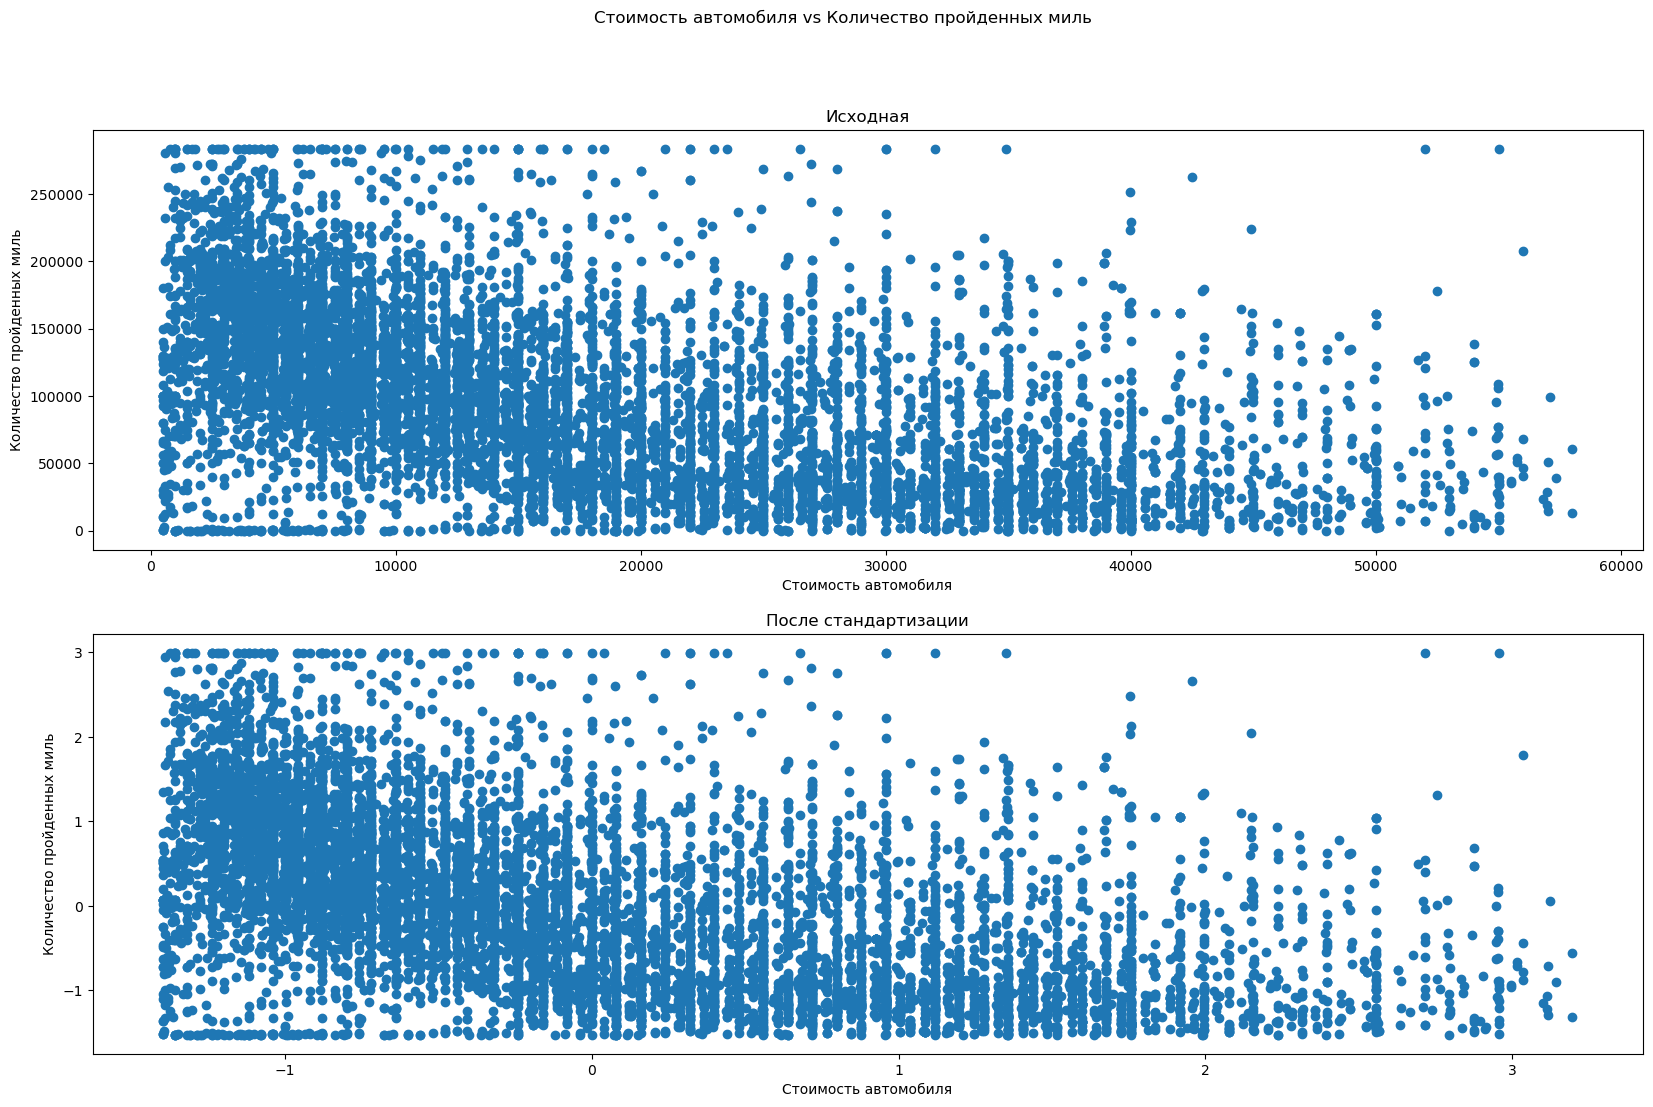

In [112]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

ax1.scatter(df_clean.price, df_clean.odometer)
ax1.set_title('Исходная')
ax1.set_ylabel('Количество пройденных миль')
ax1.set_xlabel('Стоимость автомобиля')


ax2.scatter(df_clean.std_scaled_price, df_clean.std_scaled_odometer)
ax2.set_title('После стандартизации')
ax2.set_ylabel('Количество пройденных миль')
ax2.set_xlabel('Стоимость автомобиля')

fig.suptitle('Стоимость автомобиля vs Количество пройденных миль');

In [113]:
# Нормализация 'lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 
# 'model_len', 'model_word_count'

data = df_clean[['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']]
data

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count
0,35.060000,-85.250000,2020,0.499036,4482,0,22,5
1,40.821805,-74.061962,2016,3.542852,968,0,20,4
2,33.779214,-84.411811,2017,0.394718,4286,0,16,3
3,35.715954,-78.655304,2013,8.089034,3241,0,4,1
5,35.970000,-83.940000,2012,5.515079,4851,0,22,5
...,...,...,...,...,...,...,...,...
9995,42.123900,-79.189500,2002,33.370412,1710,0,4,1
9996,43.216990,-77.755610,2008,7.835323,948,0,8,1
9997,44.925908,-122.982753,2011,16.696387,909,0,25,5
9998,43.029559,-89.397796,2015,1.941787,3644,0,7,1


In [114]:
std_scaler_2 = StandardScaler()
std_scaler_2.fit(data)

StandardScaler()

In [115]:
std_scaler_transform = std_scaler_2.transform(data)
std_scaler_transform

array([[-0.66260594,  0.47633895,  1.31157873, ..., -0.36302813,
         1.1551862 ,  1.90048886],
       [ 0.4494471 ,  1.15700833,  0.69468289, ..., -0.36302813,
         0.92501082,  1.2277036 ],
       [-0.90980312,  0.52733355,  0.84890685, ..., -0.36302813,
         0.46466004,  0.55491834],
       ...,
       [ 1.24155655, -1.81928516, -0.07643691, ..., -0.36302813,
         1.50044929,  1.90048886],
       [ 0.87555307,  0.22399106,  0.54045893, ..., -0.36302813,
        -0.57112921, -0.79065219],
       [-0.35186905,  1.02084827,  0.84890685, ..., -0.36302813,
         1.1551862 ,  1.90048886]])

In [116]:
df_clean[['lat_std',
 'long_std',
 'year_std',
 'odometer/price_std',
 'desc_len_std',
 'model_in_desc_std',
 'model_len_std',
 'model_word_count_std']] = std_scaler_transform

df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,std_scaled_odometer,std_scaled_price,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,-1.085675,2.955331,-0.662606,0.476339,1.311579,-0.517343,0.626900,-0.363028,1.155186,1.900489
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,-0.566218,-0.084279,0.449447,1.157008,0.694683,-0.408052,-0.649034,-0.363028,0.925011,1.227704
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,-1.299223,1.405488,-0.909803,0.527334,0.848907,-0.521088,0.555733,-0.363028,0.464660,0.554918
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.346837,-0.279368,-0.536004,0.877554,0.232011,-0.244818,0.176293,-0.363028,-0.916392,-0.790652
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,-0.240300,-0.272178,-0.486972,0.556038,0.077787,-0.337238,0.760884,-0.363028,1.155186,1.900489


In [117]:
# Нормализация 'month', 'dayofweek', 'diff_years'


std_scaler_3 = StandardScaler()
std_scaler_3.fit(df_clean[['month', 'dayofweek', 'diff_years']])

StandardScaler()

In [118]:
std_scaler_transform = std_scaler_3.transform(df_clean[['month', 'dayofweek', 'diff_years']])
std_scaler_transform

array([[-0.61551116,  1.12297753,  1.31157873],
       [ 1.62466592, -1.37302536,  0.69468289],
       [-0.61551116, -0.37462421,  0.84890685],
       ...,
       [-0.61551116,  0.12457637, -0.07643691],
       [-0.61551116, -0.37462421,  0.54045893],
       [-0.61551116,  1.12297753,  0.84890685]])

In [119]:
df_clean[['month_std', 'dayofweek_std', 'diff_years_std']] = std_scaler_transform

df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.476339,1.311579,-0.517343,0.626900,-0.363028,1.155186,1.900489,-0.615511,1.122978,1.311579
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,1.157008,0.694683,-0.408052,-0.649034,-0.363028,0.925011,1.227704,1.624666,-1.373025,0.694683
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.527334,0.848907,-0.521088,0.555733,-0.363028,0.464660,0.554918,-0.615511,-0.374624,0.848907
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.877554,0.232011,-0.244818,0.176293,-0.363028,-0.916392,-0.790652,-0.615511,1.122978,0.232011
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.556038,0.077787,-0.337238,0.760884,-0.363028,1.155186,1.900489,-0.615511,0.124576,0.077787


### Финальный датасет

In [120]:
columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer_km', 'odometer/price', 'region_new', 'region_corrected', 'manufacturer_model',
                    'desc_len', 'model_in_desc', 'price_k$', 'age_category', 'model_len', 'model_word_count',
                    'short_model', 'date', 'std_scaled_price',
                    'month', 'dayofweek', 'diff_years',
                    'odometer/price_std']

df_prepared = df_clean.drop(columns=columns_for_drop, axis=1)
df_prepared.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,...,lat_std,long_std,year_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,0,0,0,...,-0.662606,0.476339,1.311579,0.626900,-0.363028,1.155186,1.900489,-0.615511,1.122978,1.311579
1,7316380095,16942,medium,0,1,0,0,0,0,0,...,0.449447,1.157008,0.694683,-0.649034,-0.363028,0.925011,1.227704,1.624666,-1.373025,0.694683
2,7313733749,35590,high,0,0,0,0,0,0,0,...,-0.909803,0.527334,0.848907,0.555733,-0.363028,0.464660,0.554918,-0.615511,-0.374624,0.848907
3,7308210929,14500,medium,0,0,0,1,0,0,0,...,-0.536004,0.877554,0.232011,0.176293,-0.363028,-0.916392,-0.790652,-0.615511,1.122978,0.232011
5,7303797340,14590,medium,0,0,0,0,0,0,0,...,-0.486972,0.556038,0.077787,0.760884,-0.363028,1.155186,1.900489,-0.615511,0.124576,0.077787


In [121]:
feature_list = df_prepared.columns.to_list()
for i in feature_list:
    print(i)

id
price
price_category
is_audi
is_ford
is_chevrolet
is_toyota
is_jeep
is_honda
is_nissan
fuel_diesel
fuel_electric
fuel_gas
fuel_hybrid
fuel_other
short_model_-benz
short_model_1
short_model_124
short_model_128i
short_model_135i
short_model_1500
short_model_163869
short_model_1928
short_model_1951
short_model_1954
short_model_1960s
short_model_1966
short_model_1968
short_model_1972
short_model_1977
short_model_1978
short_model_198.5
short_model_1988
short_model_1994
short_model_1999
short_model_2
short_model_200
short_model_2000
short_model_2002
short_model_2006
short_model_2007
short_model_2008
short_model_2009
short_model_2012
short_model_2015
short_model_2016
short_model_2017
short_model_2018
short_model_210
short_model_240
short_model_2500
short_model_2500hd
short_model_280zx
short_model_3
short_model_3-series
short_model_3-window
short_model_3.2
short_model_300
short_model_300-series
short_model_300c
short_model_300s
short_model_300zx
short_model_3100
short_model_318i
short_model

In [122]:
df_prepared.to_csv('final_dataset.csv', index=False)

# Modelling

### Целевая переменная

In [123]:
df = pd.read_csv('final_dataset.csv')
df.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,...,lat_std,long_std,year_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,0,0,0,...,-0.662606,0.476339,1.311579,0.626900,-0.363028,1.155186,1.900489,-0.615511,1.122978,1.311579
1,7316380095,16942,medium,0,1,0,0,0,0,0,...,0.449447,1.157008,0.694683,-0.649034,-0.363028,0.925011,1.227704,1.624666,-1.373025,0.694683
2,7313733749,35590,high,0,0,0,0,0,0,0,...,-0.909803,0.527334,0.848907,0.555733,-0.363028,0.464660,0.554918,-0.615511,-0.374624,0.848907
3,7308210929,14500,medium,0,0,0,1,0,0,0,...,-0.536004,0.877554,0.232011,0.176293,-0.363028,-0.916392,-0.790652,-0.615511,1.122978,0.232011
4,7303797340,14590,medium,0,0,0,0,0,0,0,...,-0.486972,0.556038,0.077787,0.760884,-0.363028,1.155186,1.900489,-0.615511,0.124576,0.077787


In [124]:
df['price_category'].value_counts(normalize = True)

low       0.334247
medium    0.333931
high      0.331822
Name: price_category, dtype: float64

Text(0.5, 1.0, 'Распределение стоимости автомобиля')

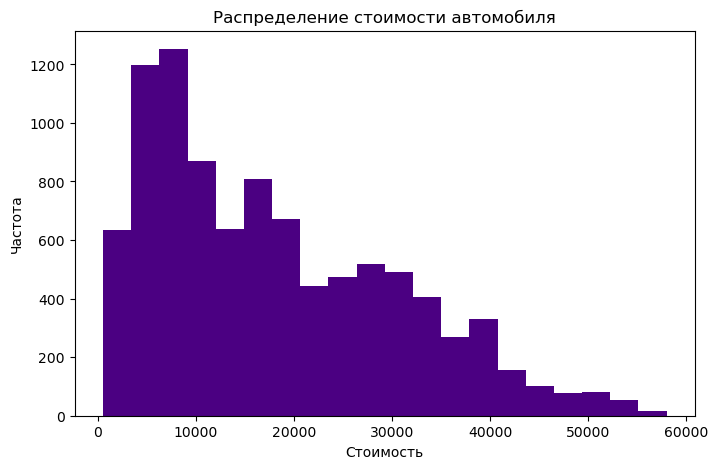

In [125]:
plt.figure(figsize=(8, 5))
plt.hist(df.price, color='indigo', bins=20)
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля')

### Подготовка к обучению

In [126]:
df_prepared = df.copy()
df_prepared = df_prepared.drop(['price', 'id'], axis=1)

In [127]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [129]:
x_train.shape, x_test.shape

((6636, 1451), (2845, 1451))

### Случайный лес

In [130]:
# Первое обучение

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [131]:
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)

In [132]:
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.7602811950790861


In [133]:
confusion_matrix(y_test, predicted_test_rf)

array([[778,  31, 135],
       [ 19, 805, 130],
       [148, 219, 580]])

In [134]:
# Обработка нулевых фичей


f_imp_list = list(zip(x_train.columns, rf_clf.feature_importances_))
f_imp_list.sort(key = lambda x: x[1])
f_imp_list

[('short_model_-benz', 0.0),
 ('short_model_1966', 0.0),
 ('short_model_1968', 0.0),
 ('short_model_1978', 0.0),
 ('short_model_2000', 0.0),
 ('short_model_2012', 0.0),
 ('short_model_2015', 0.0),
 ('short_model_300-series', 0.0),
 ('short_model_300c', 0.0),
 ('short_model_300zx', 0.0),
 ('short_model_318i', 0.0),
 ('short_model_323i', 0.0),
 ('short_model_330i', 0.0),
 ('short_model_4-runner', 0.0),
 ('short_model_435i', 0.0),
 ('short_model_4x4', 0.0),
 ('short_model_535xi', 0.0),
 ('short_model_5th', 0.0),
 ('short_model_650i', 0.0),
 ('short_model_86', 0.0),
 ('short_model_928', 0.0),
 ('short_model_ALL', 0.0),
 ('short_model_AM', 0.0),
 ('short_model_AMC', 0.0),
 ('short_model_American', 0.0),
 ('short_model_BUY', 0.0),
 ('short_model_CHEVORLET', 0.0),
 ('short_model_CLICK', 0.0),
 ('short_model_Champion', 0.0),
 ('short_model_DODGE1500', 0.0),
 ('short_model_F-250', 0.0),
 ('short_model_GCM', 0.0),
 ('short_model_GULF', 0.0),
 ('short_model_Gx', 0.0),
 ('short_model_Hino', 0.0),


In [135]:
df_prepared2 = df_prepared.copy()

del_list = [position[0] for position in f_imp_list if position[1] == 0]

for column in df_prepared2.columns:
    if column in del_list:
        df_prepared2 = df_prepared2.drop([column], axis=1)
df_prepared2.shape

(9481, 1306)

In [136]:
# Повторное обучение без нулевых фичей

x = df_prepared2.drop(['price_category'], axis=1)
y = df_prepared2['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [137]:
rf_clf_2 = RandomForestClassifier()
rf_clf_2.fit(x_train, y_train)

RandomForestClassifier()

In [138]:
predicted_train_rf_2 = rf_clf_2.predict(x_train)
predicted_test_rf_2 = rf_clf_2.predict(x_test)

In [139]:
print(accuracy_score(y_train, predicted_train_rf_2))
print(accuracy_score(y_test, predicted_test_rf_2))

1.0
0.746572934973638


In [140]:
confusion_matrix(y_test, predicted_test_rf_2)

array([[768,  31, 145],
       [ 18, 793, 143],
       [149, 235, 563]])

In [141]:
# Тюнинг модели 

In [142]:
rf_clf_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [143]:
rf_tuned = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=200)
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=200)

In [144]:
preds = rf_tuned.predict(x_test)
accuracy_score(y_test, preds)

0.7652021089630932

In [145]:
# Кросс-валидация

In [146]:
# Метрики на тестовом фолде

cross_validate(rf_tuned, x, y, cv=5)

{'fit_time': array([7.06037807, 7.06200504, 7.02298188, 6.99505591, 6.95251989]),
 'score_time': array([0.22839212, 0.217839  , 0.22609115, 0.22451186, 0.22729802]),
 'test_score': array([0.77701634, 0.77953586, 0.7721519 , 0.78481013, 0.77267932])}

In [147]:
cv_score_rf = cross_val_score(rf_tuned, x, y, cv=5)
cv_score_rf
# модель показывает стабильные результаты на тестовых фолдах
# модель с низкой долей вероятности склонна к переобучению

array([0.7754349 , 0.78902954, 0.76635021, 0.78270042, 0.77373418])

### Логистическая регрессия

In [148]:
# Обучение модели

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
predicted_train = logreg.predict(x_train)
accuracy_score(y_train, predicted_train)

0.8515672091621459

In [150]:
logreg_pred = logreg.predict(x_test)
accuracy_score(y_test, logreg_pred)

0.767311072056239

In [151]:
confusion_matrix(y_test, logreg_pred)

array([[788,  21, 135],
       [ 28, 766, 160],
       [127, 191, 629]])

In [152]:
logreg.coef_

array([[ 0.43647926,  0.42053539,  0.40882193, ..., -0.0399313 ,
         0.03407228,  0.50167958],
       [-0.37314228, -0.40030995, -0.23864857, ...,  0.02856241,
        -0.0310174 , -0.42528928],
       [-0.06333698, -0.02022544, -0.17017336, ...,  0.01136889,
        -0.00305488, -0.0763903 ]])

In [153]:
# Тюнинг параметров

In [154]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [155]:
logreg_tun = LogisticRegression(C=2.5, solver='newton-cg')
logreg_tun.fit(x_train, y_train)

LogisticRegression(C=2.5, solver='newton-cg')

In [156]:
predicted_train_tun = logreg_tun.predict(x_train)
accuracy_score(y_train, predicted_train_tun)

0.8732670283303194

In [157]:
logreg_pred_tun = logreg_tun.predict(x_test)
accuracy_score(y_test, logreg_pred_tun)

0.7694200351493848

In [158]:
# Кросс-валидация

In [159]:
cross_validate(logreg_tun, x, y, cv=5)

{'fit_time': array([15.86594319, 13.75678301, 14.91281199, 15.13272285, 14.33275986]),
 'score_time': array([0.02766991, 0.02103114, 0.02033782, 0.01985407, 0.0191853 ]),
 'test_score': array([0.77912493, 0.77848101, 0.77689873, 0.76529536, 0.77689873])}

In [160]:
cv_score_logreg = cross_val_score(logreg_tun, x, y, cv=5)
cv_score_logreg
# модель показывает стабильные результаты на тестовых фолдах
# модель с низкой долей вероятности склонна к переобучению

array([0.77912493, 0.77848101, 0.77689873, 0.76529536, 0.77689873])

### Многослойный персептрон

In [161]:
# Обучение модели

mlp = MLPClassifier()
mlp.fit(x_train, y_train)

MLPClassifier()

In [162]:
pred_mlp_train = mlp.predict(x_train)
accuracy_score(y_train, pred_mlp_train)

0.9998493068113321

In [163]:
pred_mlp_test = mlp.predict(x_test)
accuracy_score(y_test, pred_mlp_test)

0.7718804920913884

In [164]:
# Тюнинг параметров

In [165]:
mlp = MLPClassifier(random_state=42, max_iter=500, activation='logistic')
mlp.fit(x_train, y_train)

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=500, random_state=42)

In [166]:
pred_mlp_train = mlp.predict(x_train)
accuracy_score(y_train, pred_mlp_train)

1.0

In [167]:
pred_mlp_test = mlp.predict(x_test)
accuracy_score(y_test, pred_mlp_test)

0.7915641476274166

In [168]:
# Кросс-валидация

In [169]:
cross_validate(mlp, x, y, cv=5)

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'fit_time': array([178.43055201, 191.52187419, 186.01960325, 180.88285708,
        180.71376491]),
 'score_time': array([0.03688121, 0.02953792, 0.03564072, 0.02902102, 0.02882004]),
 'test_score': array([0.79704797, 0.80327004, 0.79588608, 0.76635021, 0.79219409])}

In [170]:
cv_score_mlp = cross_val_score(mlp, x, y, cv=5)
cv_score_mlp
# модель показывает стабильные результаты на тестовых фолдах
# модель с низкой долей вероятности склонна к переобучению

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.79704797, 0.80327004, 0.79588608, 0.76635021, 0.79219409])

# Results

In [171]:
model_dict = {'Случайный лес': cv_score_rf, 
              'Логистическая регрессия': cv_score_logreg, 
              'Многослойный персептрон': cv_score_mlp}

for name, elem in model_dict.items():
    print(f'''
    {name}: 
    среднее значение метрики по accuracy {elem.mean()}, 
    стандартное отклонение {elem.std()}
    ''')


    Случайный лес: 
    среднее значение метрики по accuracy 0.7774498486395351, 
    стандартное отклонение 0.007781078023382174
    

    Логистическая регрессия: 
    среднее значение метрики по accuracy 0.7753397547537861, 
    стандартное отклонение 0.005097956663873276
    

    Многослойный персептрон: 
    среднее значение метрики по accuracy 0.7909496784841267, 
    стандартное отклонение 0.012806489887213517
    


In [213]:
# Отклонения во всех моделях незначительные.
# Значит, метрики не скачут от итерации к итерации и не переобучаются
# По метрике accuracy лучшие результаты дает многослойный персептрон

In [172]:
x = df_prepared2.drop(['price_category'], axis=1)
y = df_prepared2['price_category']

mlp.fit(x, y)

MLPClassifier(activation='logistic', max_iter=500, random_state=42)

In [173]:
with open('result_model.pickle', 'wb') as file:
  pickle.dump(mlp, file)